By Zeal Jinwala \
Date: January 30, 2022 \
Data Source: The Illumina and nanopore sequence datasets of the nose swab samples, generated and analyzed in the current study, are available in the European Nucleotide Archive (ENA) under accession number PRJEB28612. \
https://www.ebi.ac.uk/ena/browser/view/PRJEB28612?show=reads 


In [254]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [255]:
def fasta_readfirst(file):
    from Bio import SeqIO
    df = pd.DataFrame(columns=['IDs', 'Seqs', 'Qscore'])
    for record in SeqIO.parse(file, "fastq"):
        score = record.letter_annotations["phred_quality"]
        df = df.append({'IDs': record.id, 'Seqs': record.seq, 'Qscore':score}, ignore_index=True)
    return df

# Read Length Distribution

Text(0.5, 1.0, 'Illumina Length distribution')

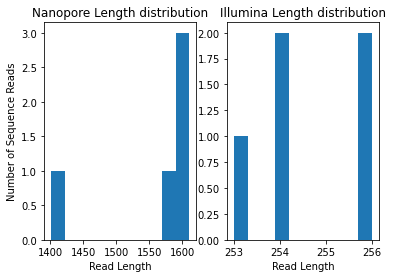

In [256]:
fileIllumina = "/Users/zsj24/GitHub/Computational-Analysis/illumina.fastq"
fileNanopore = "/Users/zsj24/GitHub/Computational-Analysis/nanopore.fastq"
dfIllumina = fasta_readfirst(fileIllumina)
dfNanopore = fasta_readfirst(fileNanopore)
readLengthsIL = dfIllumina['Seqs'].str.len()
readLengthsNP = dfNanopore['Seqs'].str.len()
plt.subplot(1, 2, 1)
plt.hist(readLengthsNP)
plt.xlabel("Read Length")
plt.ylabel('Number of Sequence Reads')
plt.title('Nanopore Length distribution')
plt.subplot(1, 2, 2)
plt.hist(readLengthsIL)
plt.xlabel("Read Length")
plt.title('Illumina Length distribution')

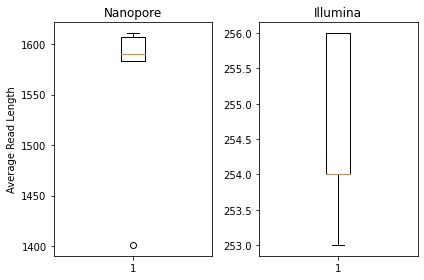

In [257]:
plt.subplot(1, 2, 1)
plt.boxplot(readLengthsNP)
plt.ylabel('Average Read Length')
plt.title('Nanopore')
plt.subplot(1, 2, 2)
plt.boxplot(readLengthsIL)
plt.title('Illumina')
plt.tight_layout()

Figure 1-2: This figure represents the distribution and average length of sequences in sequencing data using Nanopore and Illumina Sequencing. In figures 1 and 2,  the y-axis represents the Number of sequence Reads and the x-axis represents the Sequence Read Length. Nanopre shows substantially higher read lengths because it is a long read sequencing technique that uses a nanopore to detect a sequence. 

# Quality score distribution 

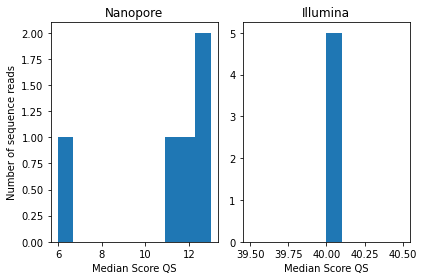

In [258]:
QscoreIL = dfIllumina['Qscore'] 
meanQSIL = [round(np.mean(QscoreIL[i]),2) for i in range(len(QscoreIL))]
medianQSIL = [round(np.median(QscoreIL[i]),2) for i in range(len(QscoreIL))]
stdQSIL = [round(np.std(QscoreIL[i]),2) for i in range(len(QscoreIL))]

QscoreNP = dfNanopore['Qscore'] 
meanQSNP = [round(np.mean(QscoreNP[i]),2) for i in range(len(QscoreNP))]
medianQSNP = [round(np.median(QscoreNP[i]),2) for i in range(len(QscoreNP))]
stdQSNP = [round(np.std(QscoreNP[i]),2) for i in range(len(QscoreNP))]

plt.subplot(1,2,1)
plt.hist(medianQSNP)
plt.xlabel('Median Score QS')
plt.ylabel('Number of sequence reads')
plt.title('Nanopore')

plt.subplot(1,2,2) 
plt.hist(medianQSIL)
plt.xlabel('Median Score QS')
plt.title('Illumina')
plt.tight_layout()

Text(0.5, 1.0, 'Illumina')

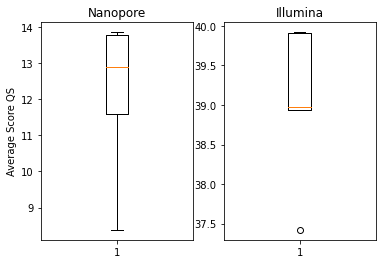

In [259]:
plt.subplot(1,2,1)
plt.boxplot(meanQSNP)
plt.ylabel('Average Score QS')
plt.title('Nanopore')
plt.subplot(1,2,2)
plt.boxplot(meanQSIL)
plt.title('Illumina')

Figure 3-4: This figure represents the distribution and average Quality score in sequencing data using Nanopore and Illumina Sequencing. The quality score is a probability that a base is called incorrectly. Higher scores indicate small probability of error and lower scores can result in a significant portion of reads being unsuable. 

# GC content

Text(0.5, 1.0, 'Illumina')

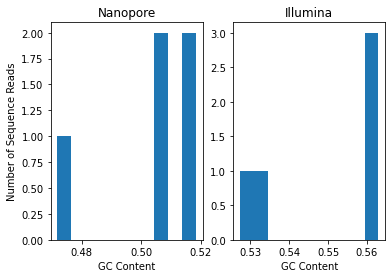

In [260]:
GCIL = []
fracIL = []
for i in range(len(dfIllumina['Seqs'])):
    GinIL = dfIllumina['Seqs'].iloc[i].count('G')
    CinIL = dfIllumina['Seqs'].iloc[i].count('C')
    GCIL.append(GinIL + CinIL)
    fracIL.append(GCIL[i]/readLengthsIL[i])
GCNP = []
fracNP = []
for i in range(len(dfNanopore['Seqs'])):
    GinNP = dfNanopore['Seqs'].iloc[i].count('G')
    CinNP = dfNanopore['Seqs'].iloc[i].count('C')
    GCNP.append(GinNP+ CinNP)
    fracNP.append(GCNP[i]/readLengthsNP[i])

plt.subplot(1,2,1)
plt.hist(fracNP)
plt.xlabel('GC Content')
plt.ylabel('Number of Sequence Reads')
plt.title('Nanopore')
plt.subplot(1,2,2)
plt.hist(fracIL)
plt.xlabel('GC Content')
plt.title('Illumina')

Text(0.5, 1.0, 'Illumina')

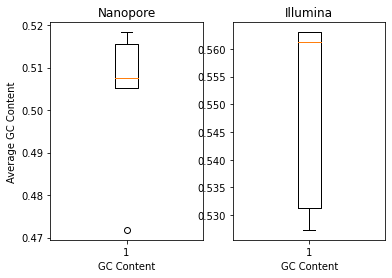

In [261]:
plt.subplot(1,2,1)
plt.boxplot(fracNP)
plt.xlabel('GC Content')
plt.ylabel('Average GC Content')
plt.title('Nanopore')
plt.subplot(1,2,2)
plt.boxplot(fracIL)
plt.xlabel('GC Content')
plt.title('Illumina')

Figure 5-6: This figure represents the distribution and average GC sequences in sequencing data using Nanopore and Illumina Sequencing. 